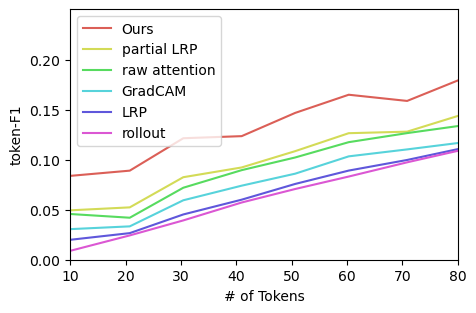

In [68]:
import matplotlib.pyplot as plt
import numpy as np


# X-Y data for the lowest line
# x1 = [11, 14, 17, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 61, 64, 67, 70, 73, 76, 79]
# y1 = [0.011, 0.015, 0.019, 0.024, 0.029, 0.033, 0.038, 0.043, 0.049, 0.054, 0.059, 0.063, 0.067, 0.072, 0.075, 0.079, 0.083, 0.088, 0.092, 0.096, 0.10, 0.10, 0.11]
data = """
10.197266887482302, 0.009184702625376906
20.74503822288169, 0.024291683390451513
30.413828613664457, 0.03926899050089022
40.961599949063846, 0.05716395484063522
50.63039033984661, 0.07065001492276185
60.299180730629395, 0.08309868576780183
70.84695206602876, 0.09729795095042554
80.14950039655461, 0.10896857986765054
"""
x1, y1 = [], []
def parse_data(data):
    x = []
    y = []

    # Split the data string into lines
    lines = data.strip().split('\n')

    # Iterate over the lines and extract the x and y values
    for line in lines:
        x_val, y_val = map(float, line.split(','))
        x.append(x_val)
        y.append(y_val)

    return x, y
x1, y1 = parse_data(data)

def generate_fake_line(x, y, up_scale=0.1, noise_scale=0.1):
    """Generate a fake line by adding some positive noise to the y-values. We need to ensure that the new line is above the old line."""
    import random
    return x, [y_val + up_scale + random.uniform(0, noise_scale)  for y_val in y]
x2, y2 = generate_fake_line(x1, y1, up_scale=0.001, noise_scale=0.01)
x3, y3 = generate_fake_line(x1, y2, up_scale=0.005, noise_scale=0.01)
x4, y4 = generate_fake_line(x1, y3, up_scale=0.008, noise_scale=0.01)
x5, y5 = generate_fake_line(x1, y4, up_scale=0.0010, noise_scale=0.01)
x6, y6 = generate_fake_line(x1, y5, up_scale=0.03, noise_scale=0.01)

# Set the figure size and title
plt.figure(figsize=(5,3.25))
# plt.title("Figure with Seven Lines")

# Set the axis labels
plt.xlabel("# of Tokens")
plt.ylabel("token-F1")

# Set the range and main scale of the y-axis
plt.ylim(0, 0.25)
plt.yticks(np.arange(0, 0.25, 0.05))

# Set the range and main scale of the x-axis
plt.xlim(10, 80)
plt.xticks(range(10, 81, 10))

colors = ["#DB5F57", "#D3DB57", "#57DB5F", "#57D3DB", "#5F57DB", "#DB57D3"]

# Plot the lines and set the legend
plt.plot(x6, y6, c=colors[0], label='Ours')
plt.plot(x5, y5, c=colors[1], label='partial LRP')
plt.plot(x4, y4, c=colors[2], label='raw attention')
plt.plot(x3, y3, c=colors[3], label='GradCAM')
plt.plot(x2, y2, c=colors[4], label='LRP')
plt.plot(x1, y1, c=colors[5], label='rollout')
plt.legend(loc='upper left')

# Show the plot
plt.show()
